![](images/2021-06-01-queensland-australia.jpg){fig-align="center"}

<center><a href = "https://unsplash.com/photos/ax7oet4UkRM">Unsplash | Kon Karampelas</a></center>

# Overview

This project deals with messy data from employee exit surveys from 2 government institutions in Queensland, Australia:

- Department of Education, Training and Employment (DETE)
- Technical and Further Education (TAFE)

The project aims to determine what percentage of the resignees was dissatisfied with work:

- based on age group
- based on career stage

On the technical side, this project is intended to showcase the use of several intermediate Pandas techniques for data cleaning and manipulation, including vectorized methods, mapping functions across data, dropping rows and columns, and combining DataFrames.

:::{.callout-note}

I wrote this notebook for the [Dataquest](https://www.dataquest.io/) course's [Guided Project: Clean and Analyze Employee Exit Surveys](https://app.dataquest.io/m/348/guided-project%3A-clean-and-analyze-employee-exit-surveys/11/next-steps). The general project flow and research questions came from Dataquest. However, all of the text and code here are written by me unless stated otherwise.

:::

# Package Installs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Overview


## TAFE Survey

The TAFE employee exit survey data can be found [here](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey).

Unfortunately, the CSV file itself is no longer available on the Australian government's websites, so I used a copy that I downloaded from Dataquest.

### Columns

Below is information about the TAFE columns.

In [2]:
tafe = pd.read_csv("./private/2021-06-01-EES-Files/tafe_survey.csv")

tafe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

The formatting is different because some column names are apparently too long. However, we can see that:

- There are 702 rows and 72 columns.
- A few columns contain decimals, and most contain text.
- Many of the columns have missing values.

Dataquest notes a few columns in this dataset:

- "`Record ID`: An id used to identify the participant of the survey"
- "`Reason for ceasing employment`: The reason why the person's employment ended"
- "`LengthofServiceOverall. Overall Length of Service at Institute (in years)`: The length of the person's employment (in years)"

Additionally, there are groups of columns that all start with the same name. These group names are:

- Contributing Factors
- Institute Views
- Work Unit Views
- Induction Info
- Workplace

Currently, there are too many columns for analysis. However, since the Contributing Factors columns are directly related to the employee's resignation, we could just keep those and remove the other 4 groups of columns.

### Descriptive Statistics

Below are descriptive statistics for the columns.

In [3]:
tafe.describe(
    include = "all",
    datetime_is_numeric = True,
)

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
count,7.020000e+02,702,702,695.000000,701,437,437,437,437,437,...,594,587,586,581,596,596,596,596,596,596
unique,NaN,12,2,NaN,6,2,2,2,2,2,...,2,2,2,2,2,9,5,9,7,7
top,NaN,Brisbane North Institute of TAFE,Non-Delivery (corporate),NaN,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,Female,56 or older,Permanent Full-time,Administration (AO),Less than 1 year,Less than 1 year
freq,NaN,161,432,NaN,340,375,336,420,403,411,...,536,512,488,416,389,162,237,293,147,177
mean,6.346026e+17,NaN,NaN,2011.423022,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,2.515071e+14,NaN,NaN,0.905977,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,6.341330e+17,NaN,NaN,2009.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,6.343954e+17,NaN,NaN,2011.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,6.345835e+17,NaN,NaN,2011.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,6.348005e+17,NaN,NaN,2012.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Some text columns appear to have values that only contain a single hyphen (-); these will have to be investigated later.


## DETE Survey

The DETE employee exit survey can be found [here](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey). The copy used in this project is a slightly modified version downloaded from Dataquest for convenience. It is still complete in terms of the number of entries.

### Columns

Below are the column names and types.

In [4]:
dete = pd.read_csv("./private/2021-06-01-EES-Files/dete_survey.csv")

dete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

`ID` contains integers, whereas all other columns either contain text or booleans. Also, many of the columns have missing values.

There are 822 rows (employees) and 56 columns (survey questions). Dataquest describes a few notable columns as follows:

- "`ID`: An id used to identify the participant of the survey"
- "`SeparationType`: The reason why the person's employment ended"
- "`Cease Date`: The year or month the person's employment ended"
- "`DETE Start Date`: The year the person began employment with the DETE"

Also, if we look closely, we can see that many of the columns in the DETE dataset match columns in the TAFE dataset. For example:

In [5]:
print("TAFE Columns")
print(list(tafe.columns[5:17]))

print("\nDETE Columns")
print(list(dete.columns[10:28]))

TAFE Columns
['Contributing Factors. Career Move - Public Sector ', 'Contributing Factors. Career Move - Private Sector ', 'Contributing Factors. Career Move - Self-employment', 'Contributing Factors. Ill Health', 'Contributing Factors. Maternity/Family', 'Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction', 'Contributing Factors. Interpersonal Conflict', 'Contributing Factors. Study', 'Contributing Factors. Travel', 'Contributing Factors. Other', 'Contributing Factors. NONE']

DETE Columns
['Career move to public sector', 'Career move to private sector', 'Interpersonal conflicts', 'Job dissatisfaction', 'Dissatisfaction with the department', 'Physical work environment', 'Lack of recognition', 'Lack of job security', 'Work location', 'Employment conditions', 'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health', 'Traumatic incident', 'Work life balance', 'Workload', 'None of the above']


These two sets of columns represent the "Contributing Factors" group in each survey. These are some of the columns that we want to keep for analysis; this will be addressed in data cleaning later.

### Descriptive Statistics

We can view descriptive statistics for all columns below.

In [6]:
dete.describe(
    include = "all",
    datetime_is_numeric = True,
)

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
count,822.000000,822,822,822,822,817,455,822,126,817,...,813,766,793,798,811,16,3,7,23,32
unique,NaN,9,25,51,46,15,8,9,14,5,...,6,6,6,2,10,1,1,1,1,1
top,NaN,Age Retirement,2012,Not Stated,Not Stated,Teacher,Primary,Metropolitan,Education Queensland,Permanent Full-time,...,A,A,A,Female,61 or older,Yes,Yes,Yes,Yes,Yes
freq,NaN,285,344,73,98,324,161,135,54,434,...,401,253,386,573,222,16,3,7,23,32
mean,411.693431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,237.705820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,206.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,411.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,616.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The `Cease Date`, `DETE Start Date`, and `Role Start Date` columns are interesting because these are in text format and some of the values are `"Not Stated"`.

Also, based on counts of non-null values shown earlier, some columns have many missing values. These will have to be addressed in data cleaning.

# Data Cleaning

## Placeholders for Missing Values

Earlier, we noticed that some columns in the DETE data contain "Not Stated" values. These are likely to be placeholders for missing data.

Therefore, we can replace all "Not Stated" values with `np.nan` null values.

In [7]:
dete = dete.replace("Not Stated", np.nan)

## Dropping Columns

In the TAFE dataset, there are 4 other big groups of columns other than Contributing Factors:

- Institute Views
- Work Unit Views
- Induction Info
- Workplace

We want to remove these columns in order to limit the columns in our dataset to the most relevant ones. This is done below.

In [8]:
tafe = tafe.drop(
    labels = tafe.columns[17:66],
    axis = 1,
)

list(tafe.columns)

['Record ID',
 'Institute',
 'WorkArea',
 'CESSATION YEAR',
 'Reason for ceasing employment',
 'Contributing Factors. Career Move - Public Sector ',
 'Contributing Factors. Career Move - Private Sector ',
 'Contributing Factors. Career Move - Self-employment',
 'Contributing Factors. Ill Health',
 'Contributing Factors. Maternity/Family',
 'Contributing Factors. Dissatisfaction',
 'Contributing Factors. Job Dissatisfaction',
 'Contributing Factors. Interpersonal Conflict',
 'Contributing Factors. Study',
 'Contributing Factors. Travel',
 'Contributing Factors. Other',
 'Contributing Factors. NONE',
 'Gender. What is your Gender?',
 'CurrentAge. Current Age',
 'Employment Type. Employment Type',
 'Classification. Classification',
 'LengthofServiceOverall. Overall Length of Service at Institute (in years)',
 'LengthofServiceCurrent. Length of Service at current workplace (in years)']

There are now only 23 columns in the TAFE dataset.

Earlier, in the Data Overview, we mentioned that DETE has similar columns to the ones in TAFE. For example, look at the columns from indices 28 to 48:

In [9]:
dete.columns[28:49]

Index(['Professional Development', 'Opportunities for promotion',
       'Staff morale', 'Workplace issue', 'Physical environment',
       'Worklife balance', 'Stress and pressure support',
       'Performance of supervisor', 'Peer support', 'Initiative', 'Skills',
       'Coach', 'Career Aspirations', 'Feedback', 'Further PD',
       'Communication', 'My say', 'Information', 'Kept informed',
       'Wellness programs', 'Health & Safety'],
      dtype='object')

These are equivalent to the TAFE columns under the Institute Views, Work Unit Views, Induction Info, and Workspace groups. We don't need these groups since the Contributing Factors group is directly related to the reason why the employees resigned.

Thus, we will remove the columns shown above from the DETE dataset.

In [10]:
dete = dete.drop(
    dete.columns[28:49],
    axis = 1,
)

len(dete.columns)

35

## Matching Columns in TAFE and DETE

Below are some important columns in TAFE and DETE which have matching information.

| DETE Survey     | TAFE Survey                                                                |
|-----------------|----------------------------------------------------------------------------|
| ID              | Record ID                                                                  |
| SeparationType  | Reason for ceasing employment                                              |
| Cease Date      | CESSATION YEAR                                                             |
| DETE Start Date | LengthofServiceOverall. Overall Length of Service at Institute (in years)  |
| Age             | CurrentAge. Current Age                                                    |
| Gender          | Gender. What is your Gender?                                               |

Notably, `DETE Start Date` and `LengthofServiceOverall` are matching columns because one can tell how long the employee has been working based on the date when they first started working.

We want to make the column names the same between the two datasets.

Before we do that, we will simplify the names in DETE.

In [11]:
dete.columns = (
    dete.columns
    .str.lower() # All lowercase
    .str.strip() # Remove whitespace on sides
    .str.replace(" ", "_") # Replace spaces with underscores
)

dete.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

The DETE columns have been simplified. 

Next, we will change some of the TAFE column labels to match the ones in the DETE dataset.

In [12]:
new_columns = {
    'Record ID': 'id',
    'CESSATION YEAR': 'cease_date',
    'Reason for ceasing employment': 'separationtype',
    'Gender. What is your Gender?': 'gender',
    'CurrentAge. Current Age': 'age',
    'Employment Type. Employment Type': 'employment_status',
    'Classification. Classification': 'position',
    'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
    'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service',
}

tafe = tafe.rename(
    new_columns,
    axis = 1,
)

list(tafe.columns)

['id',
 'Institute',
 'WorkArea',
 'cease_date',
 'separationtype',
 'Contributing Factors. Career Move - Public Sector ',
 'Contributing Factors. Career Move - Private Sector ',
 'Contributing Factors. Career Move - Self-employment',
 'Contributing Factors. Ill Health',
 'Contributing Factors. Maternity/Family',
 'Contributing Factors. Dissatisfaction',
 'Contributing Factors. Job Dissatisfaction',
 'Contributing Factors. Interpersonal Conflict',
 'Contributing Factors. Study',
 'Contributing Factors. Travel',
 'Contributing Factors. Other',
 'Contributing Factors. NONE',
 'gender',
 'age',
 'employment_status',
 'position',
 'institute_service',
 'role_service']

The Contributing Factors columns' names haven't been changed yet, but this will be dealt with later.

## Identifying Employees who Resigned

The DETE and TAFE exit surveys were given to all employees who left the institutions. Some of them were terminated from employment, some resigned, and some retired.

The goal of this project is to find out why employees resigned. Thus, we have to find out who resigned, and drop the data for the rest.

Let's do this for the DETE dataset first. The `separationtype` column explains the reason why the employee ceased to work at the institution. What values does this column contain?

In [13]:
dete["separationtype"].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

It looks like the values that are relevant to us are the ones that start with "Resignation." We'll keep the rows which indicate resignation and drop the rest.

In [14]:
dete = dete.loc[
    # Check if the string starts with "Resignation."
    dete["separationtype"].str.startswith("Resignation")
]

dete.shape

(311, 35)

After we dropped non-resignation rows, the DETE dataset was left with 311 rows.

Next, we'll do the same for the TAFE dataset. What are the values in its `separationtype` column?

In [15]:
tafe["separationtype"].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

This time, there is only one value which indicates resignation. We'll use that to identify the rows to keep.

In [16]:
tafe = tafe.loc[
    # Check if the value is "Resignation."
    tafe["separationtype"] == "Resignation"
]

tafe.shape

(340, 23)

Dropping rows resulted in having 340 rows left in the TAFE dataset.

Now, both datasets have been narrowed down to data about employees who intentionally left the institutions.

## Date Columns

Next, we'll clean and inspect date columns. Specifically, these are:

- DETE dataset
    - `dete_start_date`: The date when the employee started to work at DETE.
    - `cease_date`: The date when the employee ceased to work at DETE.
- TAFE dataset
    - `cease_date`: The date when the employee ceased to work at TAFE.

Let's start with DETE's `cease_date`. What are its values?


In [17]:
dete["cease_date"].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
07/2012      1
2010         1
09/2010      1
07/2006      1
Name: cease_date, dtype: int64

We can see that some values only contain years, and others state a month before the year. Since we can't assume the month for entries without one, we will remove all of the months. Only the years will remain, and we will store them as numerical data.

In [18]:
dete["cease_date"] = (
    dete["cease_date"]
    .str.extract("(20[0-1][0-9])") # Extract year using a regular expression
    .astype(np.float64) # Turn years into decimals
)

dete["cease_date"].value_counts().sort_index()

2006.0      1
2010.0      2
2012.0    129
2013.0    146
2014.0     22
Name: cease_date, dtype: int64

The DETE `cease_date` column now only contains year values. These range from 2006 to 2014.

Next, let's look at DETE's `dete_start_date` column.

In [19]:
dete["dete_start_date"].value_counts().sort_index()

1963     1
1971     1
1972     1
1973     1
1974     2
1975     1
1976     2
1977     1
1980     5
1982     1
1983     2
1984     1
1985     3
1986     3
1987     1
1988     4
1989     4
1990     5
1991     4
1992     6
1993     5
1994     6
1995     4
1996     6
1997     5
1998     6
1999     8
2000     9
2001     3
2002     6
2003     6
2004    14
2005    15
2006    13
2007    21
2008    22
2009    13
2010    17
2011    24
2012    21
2013    10
Name: dete_start_date, dtype: int64

The column contains only years, no months, so it is quite clean. Most of the values are from 2004 to 2013. The years in the late 1900's don't seem like outliers because there are many values spread throughout those years.

It also makes sense that there are no `dete_start_date` values after 2014, since the latest `cease_date` is 2014.

There's no need to clean this column, but let's convert it to numerical data for consistency.

In [20]:
dete["dete_start_date"] = dete["dete_start_date"].astype(np.float64)

Lastly, let's look at the TAFE dataset's `cease_date` column.

In [21]:
tafe["cease_date"].value_counts().sort_index()

2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
Name: cease_date, dtype: int64

The data here looks like it's already clean. The years are expressed as decimals, and there are no outliers to clean up. This column won't be changed.

The TAFE `cease_date` years range from 2009 to 2013. DETE's `cease_date` values range from 2006 to 2014. Therefore, both datasets give information about roughly the same period in time.

## Years of Service

Remember that one of the goals of the project is to compare dissatisfaction rates between resignees who had worked for a **short time** and those who had worked for a **longer time**. Thus, we need to know how many years of service each employee has had.

The TAFE dataset already has a column called `institute_service` which gives information on this.

In [22]:
tafe["institute_service"].value_counts().sort_index()

1-2                   64
11-20                 26
3-4                   63
5-6                   33
7-10                  21
Less than 1 year      73
More than 20 years    10
Name: institute_service, dtype: int64

These values are somewhat difficult to use since these indicate **ranges** of years of service. This will be dealt with later, but for now, we have to make a matching column in the DETE dataset.

In order to do this, we will subtract `dete_start_date` from `cease_date`. This will result in the number of years that each employee has spent working at DETE. The new column will be called `institute_service` like in the TAFE dataset.

In [23]:
dete["institute_service"] = dete["cease_date"] - dete["dete_start_date"]

dete["institute_service"].value_counts(bins = 10)

(-0.05, 4.9]    92
(4.9, 9.8]      75
(9.8, 14.7]     30
(14.7, 19.6]    26
(19.6, 24.5]    24
(24.5, 29.4]     8
(29.4, 34.3]     8
(34.3, 39.2]     7
(39.2, 44.1]     2
(44.1, 49.0]     1
Name: institute_service, dtype: int64

It can be seen that DETE employees' years of service range from under 4.9 to over 44.1. Let's view the distribution in a histogram.

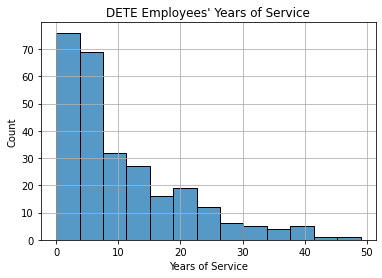

In [24]:
sns.histplot(
    data = dete,
    x = "institute_service",
)

plt.title("DETE Employees' Years of Service")
plt.xlabel("Years of Service")
plt.grid(True)
plt.show()

The distribution is right-skewed. Most employees who resigned had worked at DETE for under 10 years.


## "Contributing Factors" Columns

The Contributing Factors columns are about factors which may have influenced the employee's choice to resign. In the TAFE dataset, these columns have hyphen (`"-"`) values. This leads us to wonder what they represent, and whether or not we have to clean them.

Let's look at column 5, one of the columns with hyphens.

In [25]:
tafe.iloc[:, 5].value_counts(dropna = False)

-                              284
Career Move - Public Sector     48
NaN                              8
Name: Contributing Factors. Career Move - Public Sector , dtype: int64

Most of the values are hyphens. The rest are null values or `"Career Move - Public Sector"`.

We can infer that the Contributing Factors group of columns represent **options in a checkbox item** in the survey. That's why each column only has 2 valid values:

- `"-"` means that the option was **not selected**.
- `"Career Move - Public Sector"` means that the option was **selected**.

Thus, we can change the values in column 5 into `True` (selected) and `False` (not selected) for ease of use.

In [26]:
# Define a function to be applied to the column.
def identify_selection(value):
    if pd.isnull(value):
        return np.nan
    else:
        return value != "-"

# Apply the function elementwise.
tafe.iloc[:, 5] = tafe.iloc[:, 5].apply(identify_selection)

tafe.iloc[:, 5].value_counts(dropna = False)

False    284
True      48
NaN        8
Name: Contributing Factors. Career Move - Public Sector , dtype: int64

Now, the column only has `True`, `False`, and `NaN` values.

Let us apply this transformaton to the entire group of "Contributing Factors" columns (5 to 16).

In [27]:
tafe.iloc[:, 6:17] = tafe.iloc[:, 6:17].applymap(identify_selection)

tafe.iloc[:, 5:17].head()

,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE
3,False,False,False,False,False,False,False,False,False,True,False,False
4,False,True,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,True,False
6,False,True,False,False,True,False,False,False,False,False,True,False
7,False,False,False,False,False,False,False,False,False,False,True,False


Since these columns are now boolean columns, these will be easier to use in analysis.

It is worth noting that what we did matches the format used for Contributing Factors columns in DETE:

In [28]:
dete.iloc[:5, 10:28]

,career_move_to_public_sector,career_move_to_private_sector,interpersonal_conflicts,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,maternity/family,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above
3,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False
8,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False
11,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False


Thus, we will be able to use similar techniques to identify dissatisfaction in both datasets.

## Identifying Dissatisfaction

This project focuses on employees who resigned due to **dissatisfaction with their work** at the government institute. Thus, we have to identify which employees were dissatisfied.

In the TAFE dataset, the following columns indicate dissatisfaction:

- `Contributing Factors. Dissatisfaction`
- `Contributing Factors. Job Dissatisfaction`

We will create a new `dissatisfaction` column. It will be a boolean column that contains `True` if at least 1 of the above columns has a value of `True`.

In [29]:
tafe["dissatisfaction"] = (
    tafe[[
        "Contributing Factors. Dissatisfaction",
        "Contributing Factors. Job Dissatisfaction",
    ]]
    .any(axis = 1, skipna = False)
)

tafe["dissatisfaction"].value_counts(dropna = False)

False    241
True      99
Name: dissatisfaction, dtype: int64

It looks like 91 employees in the TAFE dataset resigned due to dissatisfaction.


As for the DETE dataset, there are many relevant columns.

- `job_dissatisfaction`
- `dissatisfaction_with_the_department`
- `physical_work_environment`
- `lack_of_recognition`
- `lack_of_job_security`
- `work_location`
- `employment_conditions`
- `work_life_balance`
- `workload`

Remember that in the survey, these phrases were options in a checkbox item asking why the employee left. A `True` value in any of these columns means that the employee considered it a reason why he/she resigned.

We will create a new `dissatisfaction` column in the DETE dataset in the same way as we did for the TAFE dataset. If at least 1 of the above columns is `True`, the corresponding value in the new column will be `True`.

In [30]:
dete["dissatisfaction"] = (
    dete[[
        'job_dissatisfaction',
        'dissatisfaction_with_the_department',
        'physical_work_environment', 'lack_of_recognition',
        'lack_of_job_security',
        'work_location',
        'employment_conditions',
        'work_life_balance', 
        'workload',
    ]]
    .any(axis = 1, skipna = False)
)

dete["dissatisfaction"].value_counts(dropna = False)

False    162
True     149
Name: dissatisfaction, dtype: int64

The results show that 149 of DETE employees who resigned had been dissatisfied.

## Combining DETE and TAFE

At this point, the data cleaning we've done is sufficient for us to combine the two datasets. We will stack them vertically; they will share columns with identical names.

We will still need to be able to differentiate between DETE and TAFE employees, so we will indicate this in a new column.

In the DETE dataset, the new `institute` column will contain the string `"DETE"`.

In [31]:
dete["institute"] = "DETE"

dete["institute"].head()

3     DETE
5     DETE
8     DETE
9     DETE
11    DETE
Name: institute, dtype: object

The value in the TAFE dataset will be `"TAFE"`.

In [32]:
tafe["institute"] = "TAFE"

tafe["institute"].head()

3    TAFE
4    TAFE
5    TAFE
6    TAFE
7    TAFE
Name: institute, dtype: object

Let's now concatenate the 2 datasets vertically.

In [33]:
combined = pd.concat(
    [dete, tafe],
    axis = 0, # Vertical concatenation
    ignore_index = True,
)

print(combined.shape)
combined.head()

(651, 53)


,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,role_service
0,4.0,Resignation-Other reasons,2012.0,2005.0,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6.0,Resignation-Other reasons,2012.0,1994.0,1997,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9.0,Resignation-Other reasons,2012.0,2009.0,2009,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10.0,Resignation-Other employer,2012.0,1997.0,2008,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,12.0,Resignation-Move overseas/interstate,2012.0,2009.0,2009,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The combined dataset has 651 rows (employees) and 53 columns.

Given our research questions, the most important columns to keep are `institute_service`, `age`, and `dissatisfaction`. We would only keep the other columns if we wanted to group the employees on certain characteristics.

Thus, we will remove columns that have under 500 non-null values. These columns wouldn't have enough useful information for us to use.

In [34]:
combined.dropna(
    axis = 1,
    thresh = 500,
    inplace = True,
)

print(combined.shape)
combined.head()

(651, 10)


,id,separationtype,cease_date,position,employment_status,gender,age,institute_service,dissatisfaction,institute
0,4.0,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,36-40,7.0,False,DETE
1,6.0,Resignation-Other reasons,2012.0,Guidance Officer,Permanent Full-time,Female,41-45,18.0,True,DETE
2,9.0,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,31-35,3.0,False,DETE
3,10.0,Resignation-Other employer,2012.0,Teacher Aide,Permanent Part-time,Female,46-50,15.0,True,DETE
4,12.0,Resignation-Move overseas/interstate,2012.0,Teacher,Permanent Full-time,Male,31-35,3.0,False,DETE


Only 10 columns were left in the dataset. The 3 most important columns were kept, along with a few columns about useful demographic data.

## Cleaning Age Data

One of the goals of this project involves the `age` data. Thus, we need to ensure that this data is clean.

Let us view the unique values in the column.

In [35]:
combined["age"].value_counts().sort_index()

20 or younger    10
21  25           33
21-25            29
26  30           32
26-30            35
31  35           32
31-35            29
36  40           32
36-40            41
41  45           45
41-45            48
46  50           39
46-50            42
51-55            71
56 or older      29
56-60            26
61 or older      23
Name: age, dtype: int64

We can see that:

- All values represent a range of ages.
- Some have hyphens, and others have spaces.
- A few are phrases that say "or younger" or "or older."

Therefore, we will clean the data by defining the following function and applying it elementwise to the column:

In [36]:
def fix_age(text):
    if pd.isnull(text):
        result = np.nan
    elif "  " in text:
        result = text.replace("  ", "-")
    elif text in ["56-60", "61 or older"]:
        result = "56 or older"
    else:
        result = text

    return result

combined["age"] = combined["age"].apply(fix_age)

combined["age"].value_counts().sort_index()

20 or younger    10
21-25            62
26-30            67
31-35            61
36-40            73
41-45            93
46-50            81
51-55            71
56 or older      78
Name: age, dtype: int64

Now, the values in the `age` column are consistent.

## Categorizing Years of Service

Remember that DETE and TAFE differed in the format of their `institute_service` columns:

- DETE had decimal numbers representing the **number of years**.
- TAFE had strings, each of which represented a **range of years**.

We could take the TAFE ranges and replace them with the middle value of each range. However, this would make the data inaccurate.

Instead, we will transform the data to become more **general**. We'll group the data into **categories** which represent ranges of years. This will apply to the entire `institute_service` column in the `combined` dataset.

The article ["Age is Just a Number: Engage Employees by Career Stage, Too"](https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage) states that employee engagement can be better understood in the context of career stage, i.e., the number of years working at the company. Career stage influences an employee's work attitude and virtues that they value in the workplace.

We can also say that career stage influences employees' decisions to resign. The most obvious example of this is that a new employee isn't very invested in the company and would be more likely to leave due to initial dissatisfaction.

The article gives the following 4 career stages:

- Newbie (0 to 3 years)
- Sophomore (3 to 7 years)
- Tenured (7 to 11 years)
- Sage (11 or more years)

We will use the above career stages as categories in the `institute_service` column. But first, we have to be prepared for what kinds of values we will have to transform.

In [37]:
combined["institute_service"].unique()

array([7.0, 18.0, 3.0, 15.0, 14.0, 5.0, nan, 30.0, 32.0, 39.0, 17.0, 9.0,
       6.0, 1.0, 35.0, 38.0, 36.0, 19.0, 4.0, 26.0, 10.0, 8.0, 2.0, 0.0,
       23.0, 13.0, 16.0, 12.0, 21.0, 20.0, 24.0, 33.0, 22.0, 28.0, 49.0,
       11.0, 41.0, 27.0, 42.0, 25.0, 29.0, 34.0, 31.0, '3-4', '7-10',
       '1-2', 'Less than 1 year', '11-20', '5-6', 'More than 20 years'],
      dtype=object)

The values above include:

- Decimal numbers
- A range of years (`"x-y"`)
- A phrase describing a range of years (`"Less than x years"`)

### Extracting Numbers

Based on the values present, we will extract the number of years using the **regular expression** `([0-9]{1,2})`. This will capture the first 1 or 2 digit whole number in a string.

- For decimals, the part of the number before the decimal point will be extracted.
- For ranges of years, the minimum year will be extracted.
- For phrases, the first number to appear will be extracted.

In [38]:
combined["service_num"] = (
    combined["institute_service"]
    .astype(str) # Convert to strings.
    .str.extract("([0-9]{1,2})") # Extract 1 or 2-digit number.
    .astype(np.float64) # Convert to decimals.
)

combined["service_num"].unique()

array([ 7., 18.,  3., 15., 14.,  5., nan, 30., 32., 39., 17.,  9.,  6.,
        1., 35., 38., 36., 19.,  4., 26., 10.,  8.,  2.,  0., 23., 13.,
       16., 12., 21., 20., 24., 33., 22., 28., 49., 11., 41., 27., 42.,
       25., 29., 34., 31.])

This worked for the decimals, as seen below. The initial and final values are identical.

In [39]:
combined.loc[
    combined["institute_service"].astype(str).str.contains("."),
    ["institute_service", "service_num"]
].head()

,institute_service,service_num
0,7.0,7.0
1,18.0,18.0
2,3.0,3.0
3,15.0,15.0
4,3.0,3.0


We can tell that this worked for the ranges because the minimum value was extracted. For example, for `"3-4"`, the number 3 was extracted.

In [40]:
combined.loc[
    combined["institute_service"].astype(str).str.contains("-"),
    ["institute_service", "service_num"]
].head()

,institute_service,service_num
312,3-4,3.0
313,7-10,7.0
314,3-4,3.0
315,3-4,3.0
316,3-4,3.0


It also worked for the phrases, as seen below. The number in the phrase was extracted.

In [41]:
combined.loc[
    combined["institute_service"].astype(str).str.contains("than"),
    ["institute_service", "service_num"]
].head()

,institute_service,service_num
318,Less than 1 year,1.0
329,Less than 1 year,1.0
332,More than 20 years,20.0
333,Less than 1 year,1.0
334,Less than 1 year,1.0


### Mapping Numbers to Categories

Now that we have numbers, we can map them to the career stages mentioned earlier:

- Newbie (0 to 3 years)
- Sophomore (3 to 7 years)
- Tenured (7 to 11 years)
- Sage (11 or more years)

We'll do this by defining a function then applying it elementwise to the column.

In [42]:
# Function that returns career stage based on number of years.
def career_stage(years):
    if pd.isnull(years):
        stage = np.nan
    elif years < 3.0:
        stage = "Newbie"
    elif years < 7.0:
        stage = "Sophomore"
    elif years < 11.0:
        stage = "Tenured"
    elif years >= 11.0:
        stage = "Sage"
    
    return stage

# Apply the function elementwise and make a new column.
combined["service_cat"] = combined["service_num"].apply(career_stage)

combined["service_cat"].value_counts()

Newbie       193
Sophomore    172
Sage         136
Tenured       62
Name: service_cat, dtype: int64

The results show that most of the employees who resigned were Newbies.

Data cleaning is now complete, so we can go to data analysis.

# Data Analysis


## Dissatisfaction by Age Group

First, we can investigate the dissatisfaction rates of resignees by their age group.

In [43]:
# Drop missing values in specific columns.
df = combined.dropna(subset = ["dissatisfaction", "age"]).copy()

# Cast booleans to integers.
df["dissatisfaction"] = df["dissatisfaction"].astype(int)

table_3 = df.pivot_table(
    values = ["dissatisfaction"],
    index = ["age"],
    aggfunc = np.mean, # Mean will determine the percentage of True values. True is 1; False is 0.
).reset_index()

table_3

,age,dissatisfaction
0,20 or younger,0.200000
1,21-25,0.306452
2,26-30,0.417910
3,31-35,0.377049
4,36-40,0.342466
5,41-45,0.376344
6,46-50,0.382716
7,51-55,0.422535
8,56 or older,0.423077


This table is visualized in the bar graph below.

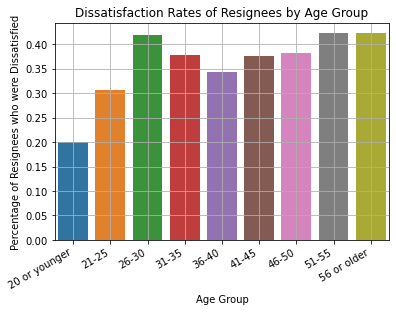

In [44]:
sns.barplot(
    data = table_3,
    x = "age",
    y = "dissatisfaction",
    estimator = np.mean,
    ci = None,
)

plt.title("Dissatisfaction Rates of Resignees by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Percentage of Resignees who were Dissatisfied")
plt.xticks(rotation = 30, ha = "right")
plt.grid(True)
plt.show()

Notably, the dissatisfaction rate is:

- Lowest (20%) among resignees aged 20 or younger.
- Above 30% among resignees aged 21 or older.
- Highest (42%) among resignees aged 56 or older, 51-55, or 26-30.

Let's group the data further using the institute (DETE or TAFE).

In [45]:
table_4 = df.pivot_table(
    values = ["dissatisfaction"],
    index = ["age", "institute"],
    aggfunc = np.mean, # Mean will determine the percentage of True values. True is 1; False is 0.
).reset_index()

table_4

,age,institute,dissatisfaction
0,20 or younger,DETE,0.000000
1,20 or younger,TAFE,0.222222
2,21-25,DETE,0.310345
3,21-25,TAFE,0.303030
4,26-30,DETE,0.571429
5,26-30,TAFE,0.250000
6,31-35,DETE,0.551724
7,31-35,TAFE,0.218750
8,36-40,DETE,0.390244
9,36-40,TAFE,0.281250


The table is visualized in the bar graph below.

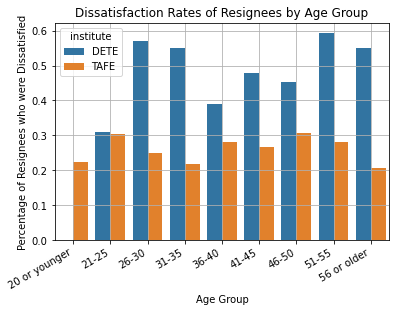

In [46]:
sns.barplot(
    data = table_4,
    x = "age",
    y = "dissatisfaction",
    hue = "institute",
    estimator = np.mean,
    ci = None,
)

plt.title("Dissatisfaction Rates of Resignees by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Percentage of Resignees who were Dissatisfied")
plt.xticks(rotation = 30, ha = "right")
plt.grid(True)
plt.show()

We can see that employees of DETE generally had much higher dissatisfaction rates than employees of TAFE across all age groups.

The exception is the "20 or younger" age group, which has a 0% dissatisfaction rate for DETE employees. However, this is due to the fact that only one resignee from DETE was 20 years old or younger.

In [47]:
(
    combined
    .loc[combined["institute"] == "DETE", "age"]
    .value_counts()
    .sort_index()
)

20 or younger     1
21-25            29
26-30            35
31-35            29
36-40            41
41-45            48
46-50            42
51-55            32
56 or older      49
Name: age, dtype: int64

Thus, we can generally say that the dissatisfaction rate was much higher among DETE resignees compared to TAFE resignees.

Also, the peak dissatisfaction rates occurred in age groups around **26-30 years old and 51-55 years old** for both institutes.


## Dissatisfaction by Career Stage

Next, we will determine what percentage of the resignees was dissatisfied with work based on career stage.

In [48]:
# Drop missing values in specific columns.
df = combined.dropna(subset = ["dissatisfaction", "service_cat"]).copy()

# Cast booleans to integers.
df["dissatisfaction"] = df["dissatisfaction"].astype(int)

table_1 = df.pivot_table(
    values = ["dissatisfaction"],
    index = ["service_cat"],
    aggfunc = np.mean, # Mean will determine the percentage of True values. True is 1; False is 0.
).reset_index()

table_1

,service_cat,dissatisfaction
0,Newbie,0.295337
1,Sage,0.485294
2,Sophomore,0.343023
3,Tenured,0.516129


The table is visualized in the figure below.

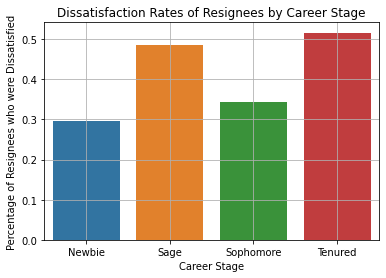

In [49]:
sns.barplot(
    data = table_1,
    x = "service_cat",
    y = "dissatisfaction",
    estimator = np.mean,
    ci = None,
)

plt.title("Dissatisfaction Rates of Resignees by Career Stage")
plt.xlabel("Career Stage")
plt.ylabel("Percentage of Resignees who were Dissatisfied")
plt.xticks(rotation = 0)
plt.grid(True)
plt.show()

Interestingly, the dissatisfaction rate is highest (around 50%) within the Tenured and Sage groups of resignees. This is surprising since these are the groups of employees who have been working at the institute for the longest time.

One explanation could be that they became dissatisfied because they spent so much time at the company without career growth or without sufficient variety in their work.

Next, we can group the data further by the specific institute of the employees:

In [50]:
table_2 = df.pivot_table(
    values = ["dissatisfaction"],
    index = ["service_cat", "institute"], # Group on institute too
    aggfunc = np.mean,
).reset_index()

table_2

,service_cat,institute,dissatisfaction
0,Newbie,DETE,0.375000
1,Newbie,TAFE,0.262774
2,Sage,DETE,0.560000
3,Sage,TAFE,0.277778
4,Sophomore,DETE,0.460526
5,Sophomore,TAFE,0.250000
6,Tenured,DETE,0.609756
7,Tenured,TAFE,0.333333


This table is visualized below.

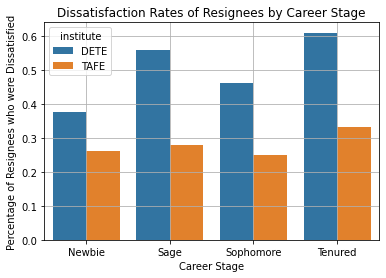

In [51]:
sns.barplot(
    data = table_2,
    x = "service_cat",
    y = "dissatisfaction",
    hue = "institute",
    estimator = np.mean,
    ci = None,
)

plt.title("Dissatisfaction Rates of Resignees by Career Stage")
plt.xlabel("Career Stage")
plt.ylabel("Percentage of Resignees who were Dissatisfied")
plt.xticks(rotation = 0)
plt.grid(True)
plt.show()

The chart shows that the trend is generally consistent between DETE and TAFE. **Tenured and Sage resignees have a higher dissatisfaction rate than other groups.**

However, it looks like the dissatisfaction rates in DETE are also much higher than the rates in TAFE. It can be said that dissatisfaction influences the resignation of a greater percentage of people in DETE than it does in TAFE.

# Conclusion

In this project, we worked with 2 datasets of employee exit survey data from the DETE and TAFE government institutes in Australia. We cleaned, transformed, and combined these datasets. Then, we analyzed dissatisfaction rates of resignees based on age and based on career stage.

We found the following notable points:

- Dissatisfaction rate was highest among resignees in age groups around **26-30 years old and 51-55 years old** for both institutes.
- Dissatisfaction rate was highest among resignees who had been working at the institute for **over 7 years**.
- The dissatisfaction rate was much **higher among DETE resignees** compared to TAFE resignees. This may have to do with the nature or conditions of the work of DETE employees.

Thanks for reading!